# UT analysis and determination of CKM parameters

In [1]:
import arviz as az
import numpy as np
import pymc as pm
import pytensor.tensor as at

az.style.use("arviz-darkgrid")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
with pm.Model() as model:
    a = pm.Normal("a", mu=0, sigma=100)
    lamda = pm.Exponential("lamda", scale=1)
    rho = pm.Exponential("rho", scale=1)
    eta = pm.Exponential("eta", scale=1)

In [3]:
with model:
    vub0 = a * lamda ** 3 * pm.math.sqrt(rho ** 2 + eta ** 2)
    vcb0 = a * lamda ** 2
    beta0 = at.arctan(eta / (1 - rho))
    gamma0 = at.arctan(eta / rho)
    alpha0 = np.pi - gamma0 / eta - beta0
    
    vub = pm.Normal("vub", mu=vub0, sigma=0.00023, observed=0.00372)
    vcb = pm.Normal("vcb", mu=vcb0, sigma=0.0011, observed=0.0405)
    lamda_obs = pm.Normal("lambda_obs", mu=lamda, sigma=0.00089, observed=0.22574)
    gamma =  pm.Normal("gamma", mu=gamma0, sigma=700, observed=4.2)
    sin2beta =  pm.Normal("sin2beta", mu=at.sin(2*beta0), sigma=0.689, observed=0.018)
    alpha =  pm.Normal("alpha", mu=alpha0, sigma=93, observed=6)

In [4]:
with model:
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, lamda, rho, eta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
/mnt/cave/Projects/NNPDF/tutorials/Como-2023/bayes/env/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 182 divergences after tun

In [5]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/mnt/cave/Projects/NNPDF/tutorials/Como-2023/bayes/env/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


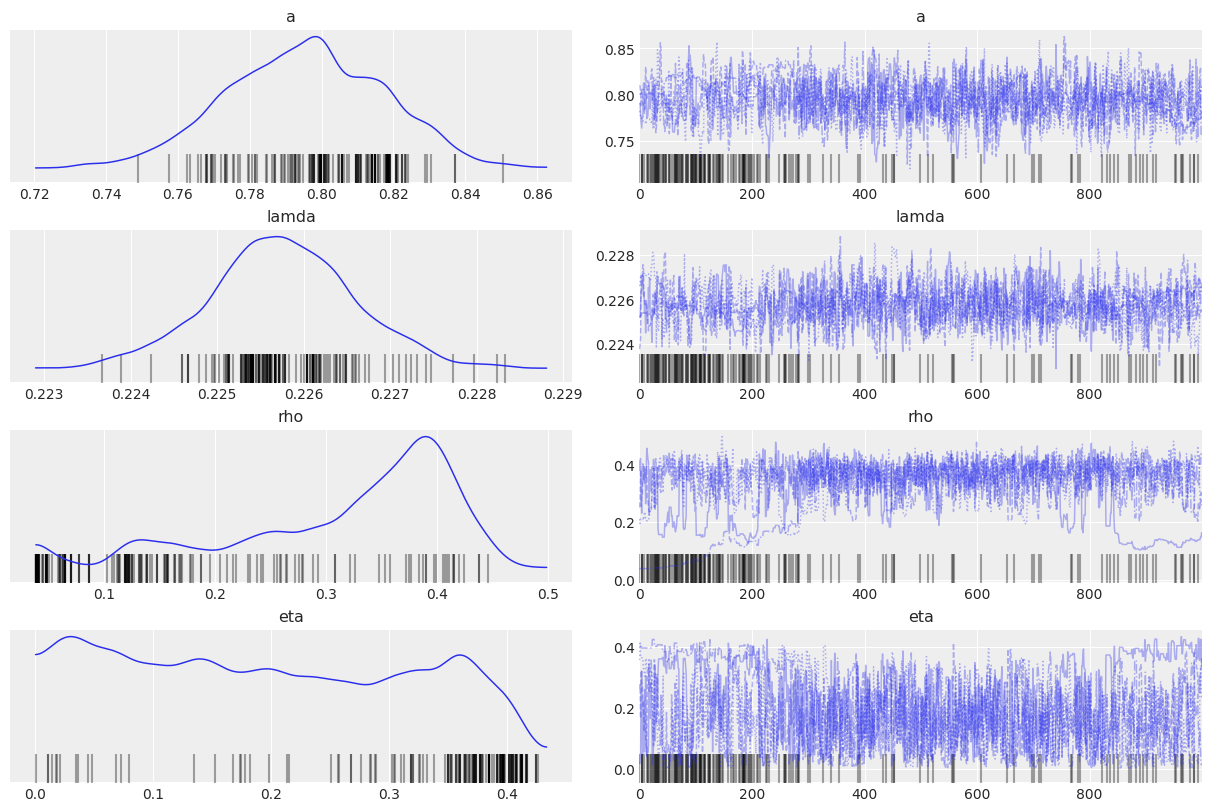

In [6]:
az.plot_trace(trace, combined=True);